<a href="https://colab.research.google.com/github/Erick88santos/Dataset_shark_anotation/blob/main/Estat%C3%ADstica/C%C3%B3digo_Colab_para_An%C3%A1lise_do_results_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arquivo '/content/results.csv' carregado com sucesso. 100 épocas encontradas.

Colunas disponíveis: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


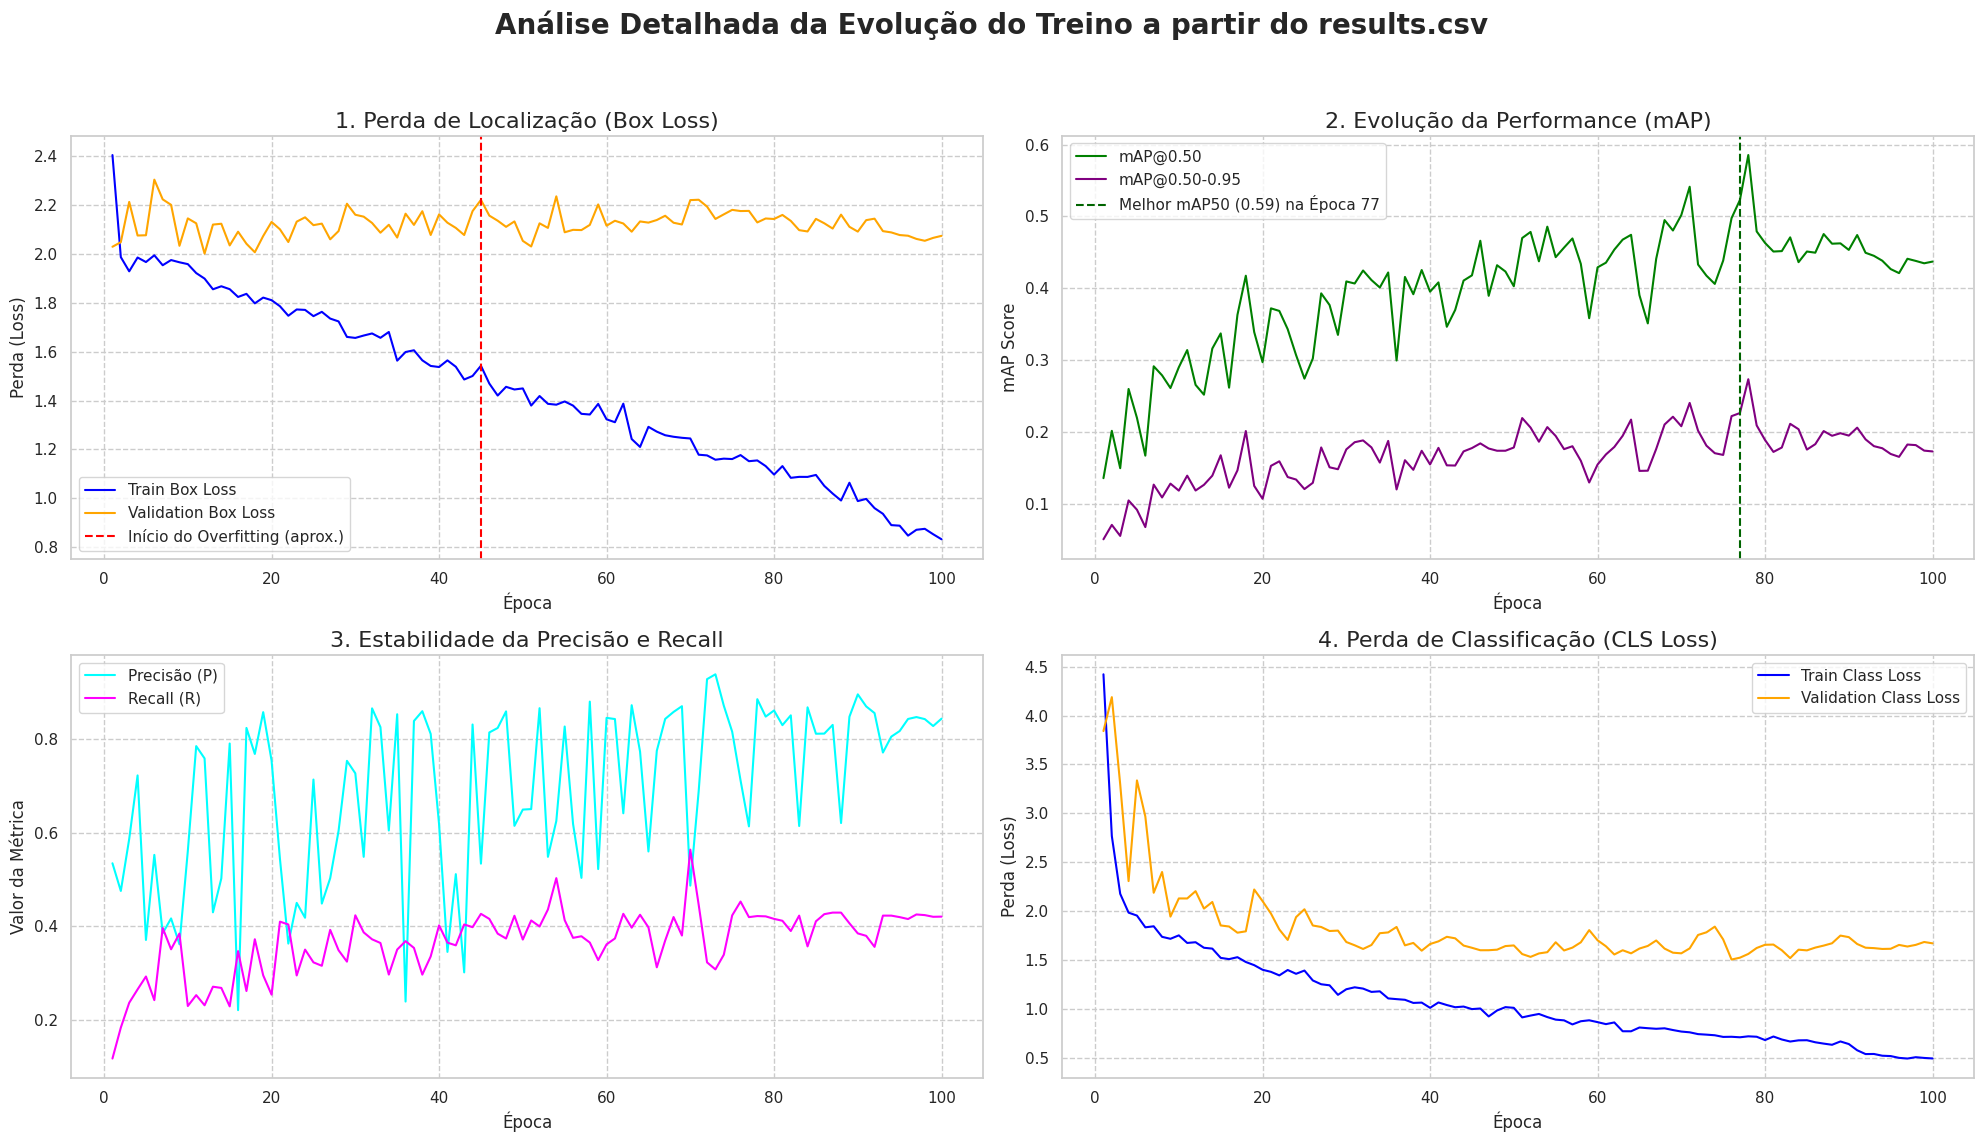

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIGURAÇÕES ---
# Certifique-se de que o arquivo 'results.csv' esteja no seu ambiente Colab
# e ajuste o caminho se necessário.
CSV_FILE_PATH = '/content/results.csv'

# --- CARREGAMENTO DOS DADOS ---
try:
    df_results = pd.read_csv(CSV_FILE_PATH)
    # Remover espaços em branco dos nomes das colunas
    df_results.columns = df_results.columns.str.strip()
    print(f"Arquivo '{CSV_FILE_PATH}' carregado com sucesso. {len(df_results)} épocas encontradas.")
    print("\nColunas disponíveis:", df_results.columns.tolist())
except FileNotFoundError:
    print(f"ERRO: Arquivo '{CSV_FILE_PATH}' não encontrado. Verifique o caminho.")
    df_results = None

# --- VISUALIZAÇÃO E ANÁLISE ---
if df_results is not None:
    # Configurações de estilo para os gráficos
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    fig.suptitle('Análise Detalhada da Evolução do Treino a partir do results.csv', fontsize=20, weight='bold')

    # GRÁFICO 1: Diagnóstico de Overfitting (Curvas de Perda)
    ax1 = axes[0, 0]
    sns.lineplot(ax=ax1, x='epoch', y='train/box_loss', data=df_results, label='Train Box Loss', color='blue')
    sns.lineplot(ax=ax1, x='epoch', y='val/box_loss', data=df_results, label='Validation Box Loss', color='orange')
    ax1.set_title('1. Perda de Localização (Box Loss)', fontsize=16)
    ax1.set_xlabel('Época', fontsize=12)
    ax1.set_ylabel('Perda (Loss)', fontsize=12)
    ax1.legend()
    ax1.grid(True, which='both', linestyle='--')
    # Adicionar linha vertical para indicar ponto de divergência (aproximado)
    ax1.axvline(x=45, color='red', linestyle='--', linewidth=1.5, label='Início do Overfitting (aprox.)')
    ax1.legend()

    # GRÁFICO 2: Evolução da Performance (mAP)
    ax2 = axes[0, 1]
    sns.lineplot(ax=ax2, x='epoch', y='metrics/mAP50(B)', data=df_results, label='mAP@0.50', color='green')
    sns.lineplot(ax=ax2, x='epoch', y='metrics/mAP50-95(B)', data=df_results, label='mAP@0.50-0.95', color='purple')
    ax2.set_title('2. Evolução da Performance (mAP)', fontsize=16)
    ax2.set_xlabel('Época', fontsize=12)
    ax2.set_ylabel('mAP Score', fontsize=12)
    # Marcar o melhor mAP50
    best_map50_epoch = df_results['metrics/mAP50(B)'].idxmax()
    best_map50_value = df_results['metrics/mAP50(B)'].max()
    ax2.axvline(x=best_map50_epoch, color='darkgreen', linestyle='--', linewidth=1.5,
                label=f'Melhor mAP50 ({best_map50_value:.2f}) na Época {best_map50_epoch}')
    ax2.legend()
    ax2.grid(True, which='both', linestyle='--')

    # GRÁFICO 3: Estabilidade de Precisão vs. Recall
    ax3 = axes[1, 0]
    sns.lineplot(ax=ax3, x='epoch', y='metrics/precision(B)', data=df_results, label='Precisão (P)', color='cyan')
    sns.lineplot(ax=ax3, x='epoch', y='metrics/recall(B)', data=df_results, label='Recall (R)', color='magenta')
    ax3.set_title('3. Estabilidade da Precisão e Recall', fontsize=16)
    ax3.set_xlabel('Época', fontsize=12)
    ax3.set_ylabel('Valor da Métrica', fontsize=12)
    ax3.legend()
    ax3.grid(True, which='both', linestyle='--')

    # GRÁFICO 4: Perda de Classificação (CLS Loss)
    ax4 = axes[1, 1]
    sns.lineplot(ax=ax4, x='epoch', y='train/cls_loss', data=df_results, label='Train Class Loss', color='blue')
    sns.lineplot(ax=ax4, x='epoch', y='val/cls_loss', data=df_results, label='Validation Class Loss', color='orange')
    ax4.set_title('4. Perda de Classificação (CLS Loss)', fontsize=16)
    ax4.set_xlabel('Época', fontsize=12)
    ax4.set_ylabel('Perda (Loss)', fontsize=12)
    ax4.legend()
    ax4.grid(True, which='both', linestyle='--')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()